# Sobre o Dataset
Este é um dataset sobre as principais organizações no github e seus maiores contribuintes
# Nós e arestas
Nesse dataset os nós são as organizações e seus contribuintes. enquanto as arestas são as ligações entre os dois
# Necessidade de filtragem de nós ou geração de subgrafo
Não foi necessaria a filtragem de nós ou geração de subgrafo


In [26]:
pip install pandas networkx


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install nxviz

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 332.3/332.3 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 54.2/54.2 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Matriz de adjacência
A matriz de adjacência é uma representação matricial de um grafo, onde as linhas e colunas da matriz representam os nós do grafo, e os valores da matriz indicam a presença ou ausência de arestas entre os nós.

In [78]:

import pandas as pd
import networkx as nx

# Carregar o dataset em um DataFrame pandas
df = pd.read_csv('datexDataA1.csv')

# Obter as colunas de origem e destino
source_column = 'Organisation'
target_column = 'member'

# Criar o grafo a partir do DataFrame
G = nx.from_pandas_edgelist(df, source=source_column, target=target_column)

# Matriz de adjacência
adjacency_matrix = nx.to_numpy_matrix(G)

# Exibir a matriz de adjacência
print(adjacency_matrix)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Diâmetro da rede
É o mais longo de todos os comprimentos do caminho calculado
# Periferia da rede
 Conjunto de nós que estão a maior distância de qualquer outro nó na rede

In [59]:
import pandas as pd
import networkx as nx

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, source='Organisation', target='member')

# Verificando se o grafo é conectado
is_connected = nx.is_connected(G)
if not is_connected:
    # Obtendo o subgrafo conectado
    G = G.subgraph(next(nx.connected_components(G)))

# Calculando o diâmetro e a periferia
diameter = nx.diameter(G)
periphery = nx.periphery(G)

# Exibindo os resultados
print("Diâmetro da rede: ", diameter)
print("Periferia da rede: ", periphery)


Diâmetro da rede:  8
Periferia da rede:  ['Nathan Bierema', 'Matt Sutkowski', 'Lenz Weber-Tronic', 'Romain Séguy', 'Jonathan Calmels', 'Aaron Plattner', 'Alex Aizman', 'Ben Barsdell', 'Davide Rossetti', 'Evan Lezar', 'Felix Abecassis', 'Luke Yeager', 'Naren Dasan', 'Oleksii Kuchaiev', 'Vinay Deshpande', 'Edouard Chin', 'Steve Schwartz', 'Michael Koziarski', 'Hartley McGuire', 'Alex Kitchens', 'Akira Matsuda', 'Andrew Atkinson', 'Arthur Nogueira Neves', 'Arun Agrawal', 'Bouke van der Bijl', 'Jean Boussier', 'Carlos Antonio da Silva', 'Godfrey Chan', 'Claudio B.', 'Daniel Colson', 'Cristian Bica', 'David Heinemeier Hansson', 'Piotr Sarnacki', 'Eileen M. Uchitelle', 'Eugene Kenny', 'Mike Dalessio', 'Xavier Noria', 'Gaurav Tiwari', 'Alex Ghiculescu', 'Gannon McGibbon', 'Greg Molnar', 'Guillaume Briday', 'Guillermo Iguaran', 'André Arko', 'Jake Niemiec', 'Jeremy Daer', 'Jonathan Hefner', 'Jon Leighton', 'Ryuta Kamizono', 'Keeran Raj Hawoldar', 'Kir Shatrov', 'Pratik', 'Lukasz Strzalkowski',

# Densidade da rede
A densidade de uma rede é uma medida que indica a proporção de conexões existentes em relação ao total de conexões possíveis.

In [40]:
import pandas as pd
import networkx as nx

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calculando a densidade
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
possible_edges = (num_nodes * (num_nodes - 1)) / 2  # Para grafos não direcionados
density = num_edges / possible_edges

# Exibindo o resultado
print("Densidade da rede: ", density)


Densidade da rede:  0.00024274273141884333


# Assortatividade de rede
A assortatividade de uma rede é uma medida que indica o grau de tendência dos nós em se conectarem a nós de graus semelhantes.

In [79]:
import pandas as pd
import networkx as nx

# Carregar o arquivo CSV em um DataFrame pandas
df = pd.read_csv('datexDataA1.csv')

# Criar o grafo a partir do DataFrame
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calcular a assortatividade
assortativity = nx.degree_assortativity_coefficient(G)

# Exibir a assortatividade
print("Assortatividade da rede:", assortativity)


Assortatividade da rede: -0.4592068713234911


# Distribuição empirica de grau
A distribuição empírica de grau em uma rede indica a frequência de ocorrência de diferentes graus nos nós da rede.

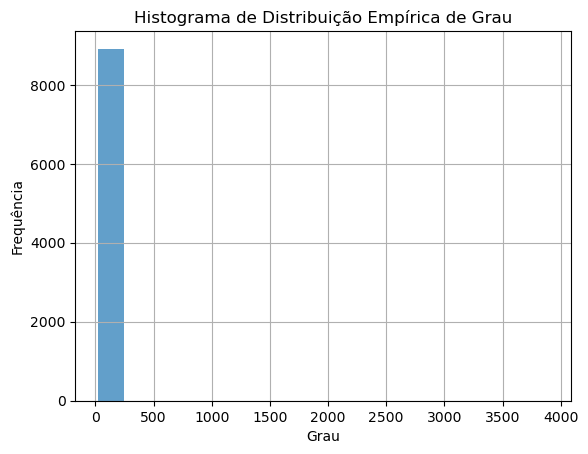

In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calculando o grau de cada nó
degree_sequence = [degree for _, degree in G.degree()]

# Traçando o histograma de distribuição empírica de grau
plt.hist(degree_sequence, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Histograma de Distribuição Empírica de Grau')
plt.grid(True)
plt.show()


# Coeficiente de clustering local 
Ele fornece uma medida da conectividade dos vizinhos de um nó

In [75]:
import pandas as pd
import networkx as nx

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Lista de nós escolhidos
nos_escolhidos = ['google']  # Substitua pelos nós de interesse

# Calculando o coeficiente de clustering local para os nós escolhidos
clustering_coefficients = nx.clustering(G, nodes=nos_escolhidos)

# Exibindo os resultados
for node, coefficient in clustering_coefficients.items():
    print("Coeficiente de clustering local para o nó", node, ":", coefficient)


Coeficiente de clustering local para o nó google : 0


# Coeficiente de clustering global
Considera a conectividade de todos os nós da rede

In [45]:
import pandas as pd
import networkx as nx

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calculando o coeficiente de clustering global
clustering_coefficient = nx.average_clustering(G)

# Exibindo o resultado
print("Coeficiente de clustering global: ", clustering_coefficient)


Coeficiente de clustering global:  0.0


# Componentes fortemente conectados
Componentes fortemente conectados em uma rede são grupos de nós onde todos os nós estão acessíveis uns aos outros por meio de caminhos direcionados.

In [46]:
import pandas as pd
import networkx as nx

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo direcionado
G = nx.from_pandas_edgelist(df, 'Organisation', 'member', create_using=nx.DiGraph)

# Calculando os componentes fortemente conectados
strongly_connected_components = list(nx.strongly_connected_components(G))

# Exibindo os componentes fortemente conectados
for component in strongly_connected_components:
    print("Componente fortemente conectado:", component)


Componente fortemente conectado: {'Oleh Aldekein'}
Componente fortemente conectado: {'None'}
Componente fortemente conectado: {'Frank Szendzielarz'}
Componente fortemente conectado: {'Kolby Moroz Liebl'}
Componente fortemente conectado: {'Marius van der Wijden'}
Componente fortemente conectado: {'Mihai Alisie'}
Componente fortemente conectado: {'Anton Nashatyrev'}
Componente fortemente conectado: {'Justin Martin'}
Componente fortemente conectado: {'RJ Catalano'}
Componente fortemente conectado: {'Yoshitomo Nakanishi'}
Componente fortemente conectado: {'Alexander Arlt'}
Componente fortemente conectado: {'Alessandro Coglio'}
Componente fortemente conectado: {'acud'}
Componente fortemente conectado: {'Patricio Palladino'}
Componente fortemente conectado: {'Angela Lu'}
Componente fortemente conectado: {'Alex Beregszaszi'}
Componente fortemente conectado: {'becca'}
Componente fortemente conectado: {'Kamil Śliwak'}
Componente fortemente conectado: {'Cesar Brazon'}
Componente fortemente conec

# Componentes conectados fracamente
Os componentes conectados fracamente em uma rede são grupos de nós onde todos os nós estão conectados uns aos outros por meio de caminhos direcionados ou não direcionados.

In [47]:
import pandas as pd
import networkx as nx

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo direcionado
G = nx.from_pandas_edgelist(df, 'Organisation', 'member', create_using=nx.DiGraph)

# Calculando os componentes conectados fracamente
weakly_connected_components = list(nx.weakly_connected_components(G))

# Exibindo os componentes conectados fracamente
for component in weakly_connected_components:
    print("Componente conectado fracamente:", component)


Componente conectado fracamente: {'Shen Chauhan', 'Hayden McAfee', 'John Wu', 'Ryan Ernst', 'Shiwei Zhang', 'Ben Vanik', 'Carl Heinrichs', 'Vadym Kliuchnikov', 'Sarah Storer', 'Stefan Bodewig', 'Zhang Yonglun', 'Ben Michel', 'Sami Siren', 'Alejandro Martínez', 'Chris Holt', 'Russell Johnston', 'Alexey Orlov', 'Nathan Bossart', 'Chacón', 'Nick Pope', 'David du Colombier', 'Chad Wach', 'Patrick Kan', 'David Khosid', 'Yuta Hiroto', 'Apu Dutta', 'Krishna Chaitanya Parimi', 'oltest', 'Pedram Pejman', 'Shiwen Cheng', 'Rob Leidle', 'Chanseok Oh', 'Paul Thomas', 'Aditya Kishore', 'Nicola Ferraro', 'Mikhail Khludnev', 'Mat Booth', 'Piotr Grzesik', 'Marcos Perez Mokarzel', 'Al Cutter', 'Weronika Zamlynny', 'Glenn Musa', 'Peter Dyson', 'Izik Lisbon', 'Rafael Marinheiro', 'Diego Perez', 'Federico Guerrini', 'Erich Gamma', 'Madeleine', 'vuejs', 'Christian Blichmann', 'Dmytro Sydorchuk', 'Paul DeCarlo', 'Neetu Singh', 'Pierfrancesco Soffritti', 'Rafael Cintron', 'Tobias Koppers', 'Oren Maoz', 'kogep

# Centralidade de Eigenvector
Centralidade de eigenvector de um nó é influenciada não apenas pela quantidade de conexões, mas também pela importância dessas conexões.

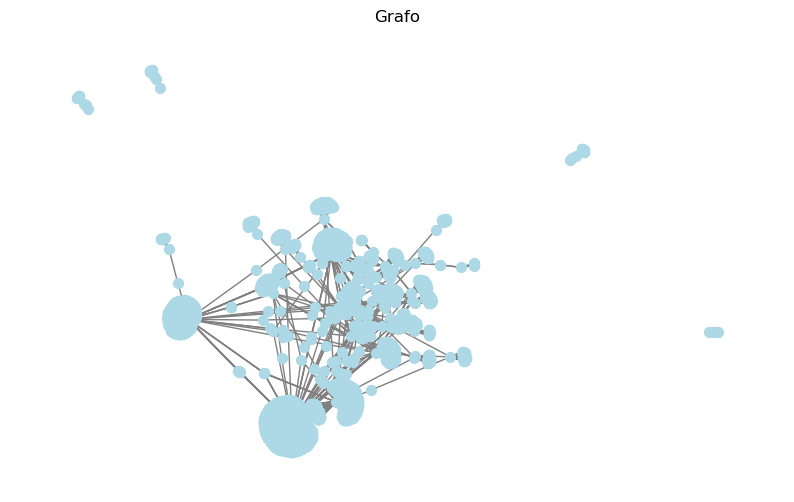

In [87]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calculando a centralidade de eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=999999)


# Desenhar o gráfico
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
ax = plt.gca()  # Obter o objeto de eixos atual
nx.draw(G, pos=pos, with_labels=False, node_color='lightblue', edge_color='gray', font_size=10, node_size=50, ax=ax)
plt.title("Grafo")
plt.show()


# Centralidade de grau
A centralidade de grau é uma medida de centralidade em uma rede que se baseia no número de conexões diretas de um nó. Ela indica o quão central um nó é na rede com base na quantidade de arestas que ele possui.

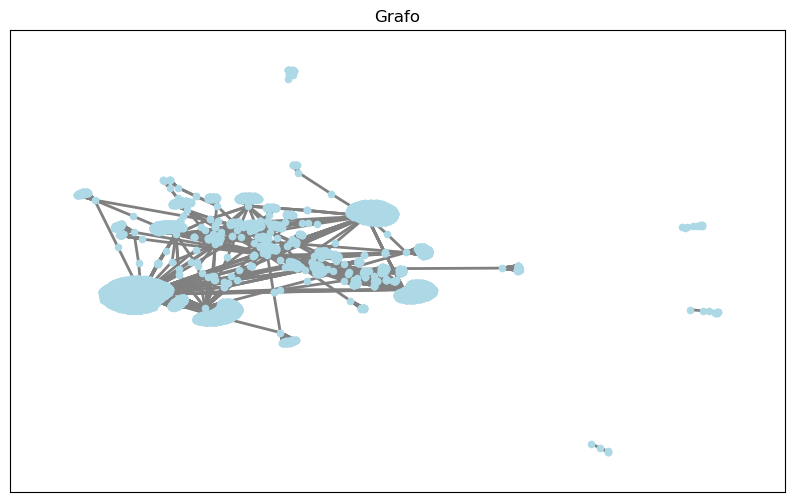

In [86]:
import pandas as pd
import networkx as nx

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calculando a centralidade de grau
degree_centrality = nx.degree_centrality(G)


# Posicionando os nós utilizando o layout de mola
pos = nx.spring_layout(G)

# Configurando as opções de visualização
options = {
    'node_color': 'lightblue',
    'edge_color': 'gray',
    'font_size': 5,
    'node_size': 20,
    'width': 2.0,
    'with_labels': False,
}

# Gerando o gráfico do grafo
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, **options)
plt.title("Grafo")
plt.show()

# Centralidade de proximidade
A centralidade de proximidade é uma medida de centralidade em uma rede que quantifica o quão próximo um nó está de todos os outros nós da rede. 

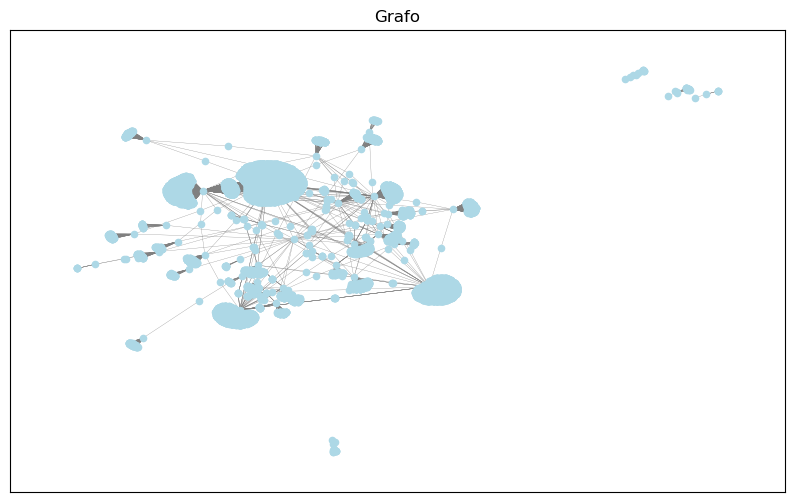

In [88]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calculando a centralidade de proximidade
closeness_centrality = nx.closeness_centrality(G)


# Posicionando os nós utilizando o layout de mola
pos = nx.spring_layout(G)

# Configurando as opções de visualização
options = {
    'node_color': 'lightblue',
    'edge_color': 'gray',
    'font_size': 10,
    'node_size': 20,
    'width': 0.2,
    'with_labels': False,
}

# Gerando o gráfico do grafo
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, **options)
plt.title("Grafo")
plt.show()


# Centralidade de intermediação do nó
A centralidade de intermediação (betweenness centrality) de um nó em um grafo mede o quão importante esse nó é na comunicação entre outros nós. Ela quantifica o número de caminhos mais curtos que passam pelo nó em relação ao total de caminhos mais curtos possíveis entre todos os pares de nós.

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_18264\3988900111.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


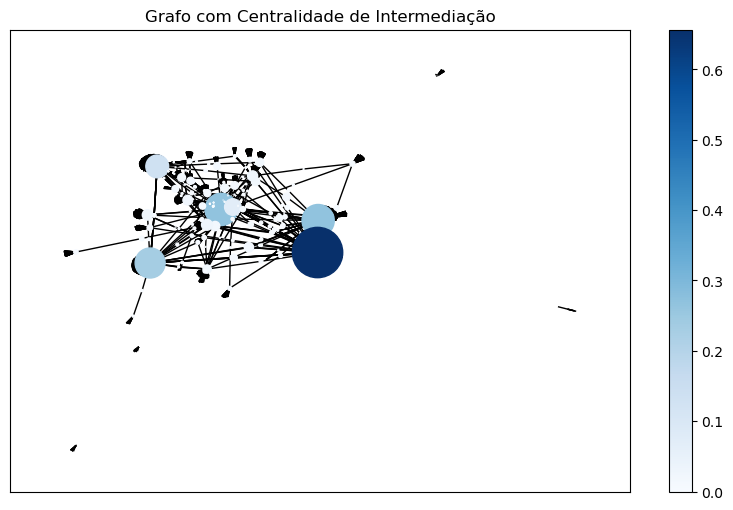

In [89]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregando o arquivo .csv
df = pd.read_csv('datexDataA1.csv')

# Criando o grafo
G = nx.from_pandas_edgelist(df, 'Organisation', 'member')

# Calculando a centralidade de intermediação
betweenness_centrality = nx.betweenness_centrality(G, k=100)


# Criando a lista de tamanhos dos nós baseado na centralidade de intermediação
node_sizes = [centrality * 2000 for centrality in betweenness_centrality.values()]

# Criando a lista de cores dos nós baseado na centralidade de intermediação
node_colors = [centrality for centrality in betweenness_centrality.values()]

# Desenhando o grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

# Criando um objeto colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues)
sm.set_array(node_colors)

# Adicionando a colorbar ao gráfico
plt.colorbar(sm)

plt.title("Grafo com Centralidade de Intermediação")
plt.show()


# Gráfico da rede

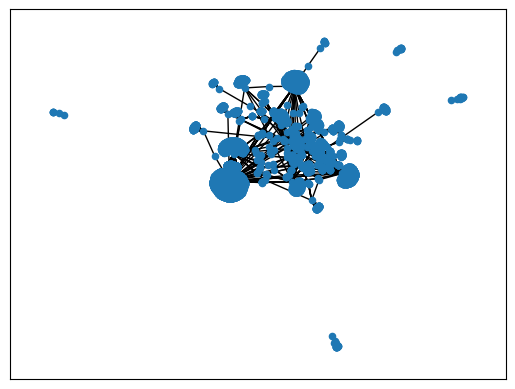

In [66]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset em um DataFrame pandas
df = pd.read_csv('datexDataA1.csv')

# Criar o grafo
G = nx.Graph()

# Adicionar nós
nodes = df['Organisation'].unique()
G.add_nodes_from(nodes)

# Adicionar arestas
edges = df[['Organisation', 'member']].dropna().values
G.add_edges_from(edges)

# Plotar o grafo
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=False, node_size  = 20)
plt.show()
